In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Candidate1.csv")
data.head()

,Run,Event,type1,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2
0,165617,75206813,G,10.1623,0.4763,-8.5164,5.5231,8.5297,0.6091,-1.5149,-1,G,19.7754,2.7508,-13.9871,13.7059,14.2550,0.8539,-1.3766,1
1,165617,75678475,G,15.8799,15.0618,-1.6658,-4.7464,15.1536,-0.3083,-0.1102,1,G,11.9338,11.9084,-0.7670,-0.0851,11.9330,-0.0071,-0.0643,-1
2,165617,74428554,G,21.8279,-6.2214,11.0845,17.7447,12.7111,1.1357,2.0823,-1,G,36.6513,-10.6874,15.0692,31.6544,18.4743,1.3076,2.1877,1
3,165617,75193169,G,19.4923,2.7612,-5.5769,-18.4719,6.2230,-1.8084,-1.1111,1,G,14.9334,1.5525,-6.1254,-13.5302,6.3190,-1.5050,-1.3226,-1
4,165617,74832715,G,8.0972,4.6127,-1.8389,6.3949,4.9657,1.0710,-0.3793,-1,T,3.5131,-0.5305,0.6880,3.4024,0.8688,2.0742,2.2276,1


In [3]:
invariant_mass = np.sqrt(2*data.pt1*data.pt2*(np.cosh(data.eta1 - data.eta2) - np.cos(data.phi1 - data.phi2)))

In [4]:
print(invariant_mass)

0        3.105639
1        4.112210
2        3.092335
3        2.323806
4        4.557513
           ...   
19995    3.101994
19996    3.061253
19997    3.076973
19998    3.052982
19999    3.114485
Length: 20000, dtype: float64


In [5]:
dataset = data.assign(M=invariant_mass)
dataset.head()

,Run,Event,type1,E1,px1,py1,pz1,pt1,eta1,phi1,...,type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,165617,75206813,G,10.1623,0.4763,-8.5164,5.5231,8.5297,0.6091,-1.5149,...,G,19.7754,2.7508,-13.9871,13.7059,14.2550,0.8539,-1.3766,1,3.105639
1,165617,75678475,G,15.8799,15.0618,-1.6658,-4.7464,15.1536,-0.3083,-0.1102,...,G,11.9338,11.9084,-0.7670,-0.0851,11.9330,-0.0071,-0.0643,-1,4.112210
2,165617,74428554,G,21.8279,-6.2214,11.0845,17.7447,12.7111,1.1357,2.0823,...,G,36.6513,-10.6874,15.0692,31.6544,18.4743,1.3076,2.1877,1,3.092335
3,165617,75193169,G,19.4923,2.7612,-5.5769,-18.4719,6.2230,-1.8084,-1.1111,...,G,14.9334,1.5525,-6.1254,-13.5302,6.3190,-1.5050,-1.3226,-1,2.323806
4,165617,74832715,G,8.0972,4.6127,-1.8389,6.3949,4.9657,1.0710,-0.3793,...,T,3.5131,-0.5305,0.6880,3.4024,0.8688,2.0742,2.2276,1,4.557513


In [6]:
dataset.M.describe()

count    20000.000000
mean         3.044139
std          0.590053
min          0.755175
25%          2.749402
50%          3.074201
75%          3.122578
max         13.239391
Name: M, dtype: float64

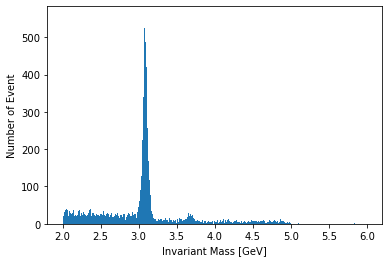

In [11]:
plt.hist(dataset.M, bins=1000,range=[2,6])
plt.xlabel("Invariant Mass [GeV]")
plt.ylabel("Number of Event")
plt.show()

In [16]:
newdata = dataset[(dataset.M >= 2.9) & (dataset.M <= 3.3)]
print(dataset.M)

0        3.105639
1        4.112210
2        3.092335
3        2.323806
4        4.557513
           ...   
19995    3.101994
19996    3.061253
19997    3.076973
19998    3.052982
19999    3.114485
Name: M, Length: 20000, dtype: float64


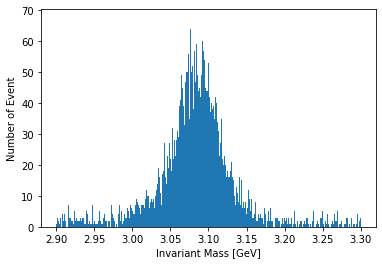

In [17]:
plt.hist(newdata.M, bins=1000)
plt.xlabel("Invariant Mass [GeV]")
plt.ylabel("Number of Event")
plt.show()

In [18]:
newdata.M.describe()

count    10827.000000
mean         3.084029
std          0.055502
min          2.900002
25%          3.060446
50%          3.084511
75%          3.108162
max          3.299743
Name: M, dtype: float64

In [19]:
se = np.std(newdata.M)/np.sqrt(newdata.shape[0])
se

0.0005333795274911483

ได้
mean = 3.084029, 
Standard Deviation = 0.055502, 
Standard Error = $ \frac{Standard Deviation}{\sqrt(n)} $ = 0.000533

เพราะฉะนั้น อนุภาคที่พบ คือ J/psi Meson เพราะมีมวลใกล้เคียงกับค่าจริงซึ่งคือ 3.096 GeV